In [44]:
import pandas as pd
import numpy as np
import os
from keras.layers import Dense, Flatten, Reshape, Input, InputLayer
from keras.models import Sequential, Model

from  matplotlib import pyplot as plt

import tensorflow as tf
import os
import PIL
import tensorflow as tf
import cv2
import random
from tensorflow import keras
from tensorflow.keras.layers import Dense,  Input, InputLayer, Flatten
from tensorflow.keras.models import Sequential, Model
%matplotlib inline

In [4]:
import matplotlib.image as mpimg

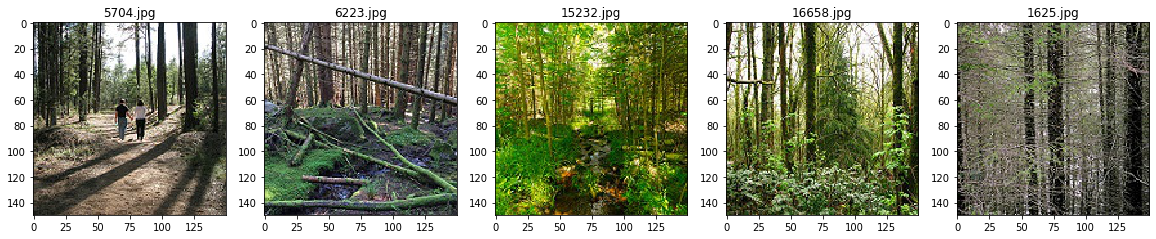

In [54]:

plt.figure(figsize=(20,20))

test_folder=r'C:\data\CV\Intel_Images\seg_train\seg_train\forest'
for i in range(5):
    file = random.choice(os.listdir(img_folder))
    image_path= os.path.join(img_folder, file)
    img=mpimg.imread(image_path)
    ax=plt.subplot(1,5,i+1)
    ax.title.set_text(file)
    plt.imshow(img)

In [59]:
IMG_WIDTH=200
IMG_HEIGHT=200
img_folder=r'C:\data\CV\Intel_Images\seg_train\seg_train\forest'

## https://keras.io/api/preprocessing/image/
## https://www.tensorflow.org/tutorials/load_data/images

In [60]:

def create_dataset(img_folder):
   
    img_data_array=[]
    class_name=[]
   
    for dir1 in os.listdir(img_folder):
        for file in os.listdir(os.path.join(img_folder, dir1)):
       
            image_path= os.path.join(img_folder, dir1,  file)
            image= cv2.imread( image_path, cv2.COLOR_BGR2RGB)
            image=cv2.resize(image, (IMG_HEIGHT, IMG_WIDTH),interpolation = cv2.INTER_AREA)
            image=np.array(image)
            image = image.astype('float32')
            image /= 255 
            img_data_array.append(image)
            class_name.append(dir1)
    return img_data_array, class_name
   

In [61]:
img_data, class_name =create_dataset(r'C:\data\CV\Intel_Images\seg_train\seg_train')

In [62]:

target_dict={k: v for v, k in enumerate(np.unique(class_name))}
target_dict


{'buildings': 0,
 'forest': 1,
 'glacier': 2,
 'mountain': 3,
 'sea': 4,
 'street': 5}

In [63]:

target_val=  [target_dict[class_name[i]] for i in range(len(class_name))]

In [64]:
len(target_val)

14034

In [67]:
model=tf.keras.Sequential(
        [
            tf.keras.layers.InputLayer(input_shape=(IMG_HEIGHT,IMG_WIDTH, 3)),
            tf.keras.layers.Conv2D(filters=32, kernel_size=3, strides=(2, 2), activation='relu'),
            tf.keras.layers.Conv2D(filters=64, kernel_size=3, strides=(2, 2), activation='relu'),
            tf.keras.layers.Flatten(),
            tf.keras.layers.Dense(6)
        ])



In [68]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 99, 99, 32)        896       
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 49, 49, 64)        18496     
_________________________________________________________________
flatten_3 (Flatten)          (None, 153664)            0         
_________________________________________________________________
dense_3 (Dense)              (None, 6)                 921990    
Total params: 941,382
Trainable params: 941,382
Non-trainable params: 0
_________________________________________________________________


In [73]:
model.compile(optimizer='rmsprop', loss='sparse_categorical_crossentropy', metrics=['accuracy'])


In [75]:
history = model.fit(x=tf.cast(np.array(img_data), tf.float64), y=tf.cast(list(map(int,target_val)),tf.int32), epochs=5)


Train on 14034 samples
Epoch 1/5
14034/14034 [==============================] - 66s 5ms/sample - loss: 11.5913 - accuracy: 0.1620
Epoch 2/5
14034/14034 [==============================] - 63s 5ms/sample - loss: 11.5913 - accuracy: 0.1620
Epoch 3/5
14034/14034 [==============================] - 64s 5ms/sample - loss: 11.5913 - accuracy: 0.1620
Epoch 4/5
14034/14034 [==============================] - 65s 5ms/sample - loss: 11.5913 - accuracy: 0.1620
Epoch 5/5
14034/14034 [==============================] - 64s 5ms/sample - loss: 11.5913 - accuracy: 0.1620


In [74]:
history = model.fit(x=np.array(img_data, np.float32), y=np.array(list(map(int,target_val)), np.float32), epochs=5)


Train on 14034 samples
Epoch 1/5
14034/14034 [==============================] - 62s 4ms/sample - loss: 11.5800 - accuracy: 0.1698
Epoch 2/5
14034/14034 [==============================] - 60s 4ms/sample - loss: 11.5913 - accuracy: 0.1620
Epoch 3/5
14034/14034 [==============================] - 61s 4ms/sample - loss: 11.5913 - accuracy: 0.1620
Epoch 4/5
14034/14034 [==============================] - 61s 4ms/sample - loss: 11.5913 - accuracy: 0.1620
Epoch 5/5
14034/14034 [==============================] - 62s 4ms/sample - loss: 11.5913 - accuracy: 0.1620
